In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage


%matplotlib inline

In [93]:
from fuel.streams import ServerDataStream

train_stream = ServerDataStream(('sax_features','targets'), False)


In [94]:
ei = train_stream.get_epoch_iterator()

In [95]:
d = next(ei)
print len(d)
for i in range(4):
    print i, d[i].shape
    #print d[i]
print d[1]
print d[3]

4
0 (16, 1)
1 (16, 1)
2 (16, 30, 64, 64)
3 (16, 2)
[[ 0.359375  ]
 [ 0.34375   ]
 [ 0.19345237]
 [ 0.33854166]
 [ 0.36458334]
 [ 0.19940475]
 [ 0.34375   ]
 [ 0.2651515 ]
 [ 0.36070481]
 [ 0.26374114]
 [ 0.32191935]
 [ 0.29999998]
 [ 0.16179079]
 [ 0.359375  ]
 [ 0.35416669]
 [ 0.33333334]]
[[  52.40000153  150.1000061 ]
 [  87.80000305  221.30000305]
 [  75.          246.        ]
 [  73.40000153  167.30000305]
 [ 209.8999939   268.29998779]
 [  58.          130.        ]
 [  51.20000076  161.80000305]
 [  17.           33.        ]
 [  58.09999847  177.19999695]
 [  89.5         213.8999939 ]
 [  37.59999847  100.90000153]
 [ 137.          268.        ]
 [  55.          156.        ]
 [  58.59999847  166.6000061 ]
 [  46.70000076  128.5       ]
 [ 174.69999695  323.1000061 ]]


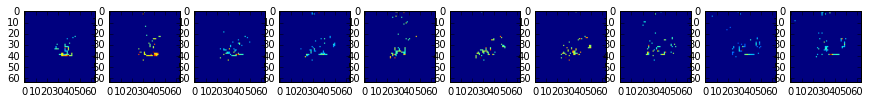

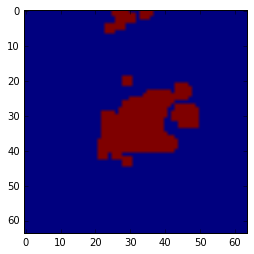

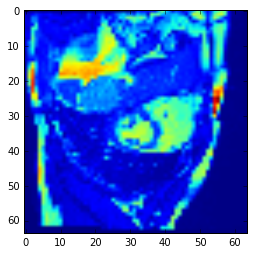

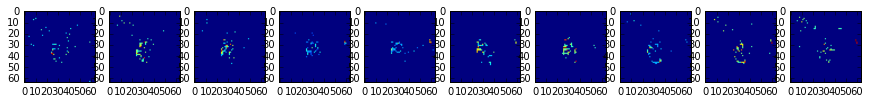

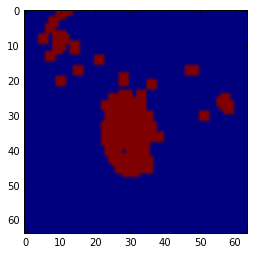

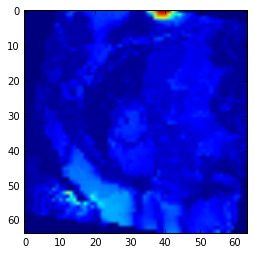

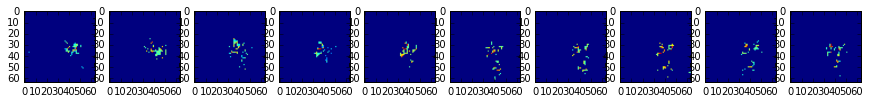

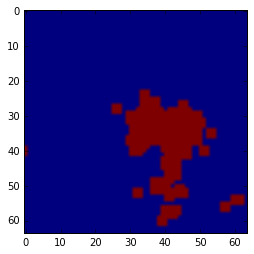

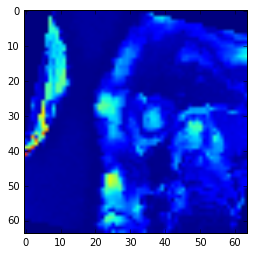

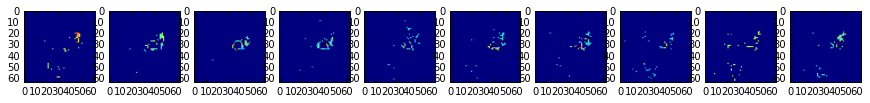

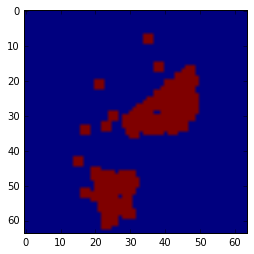

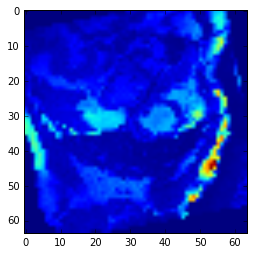

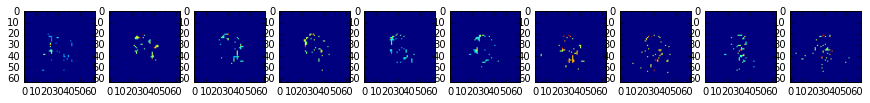

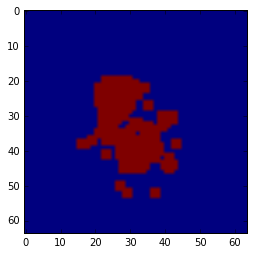

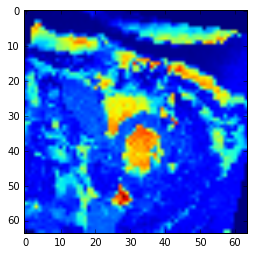

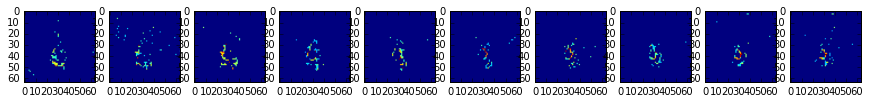

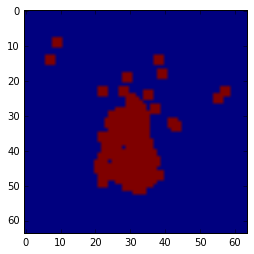

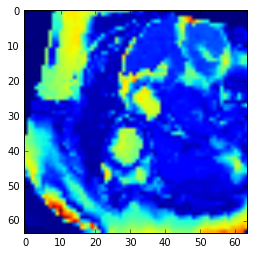

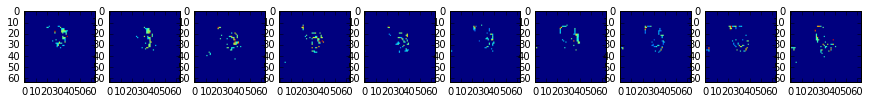

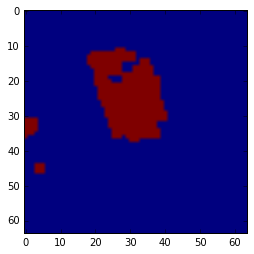

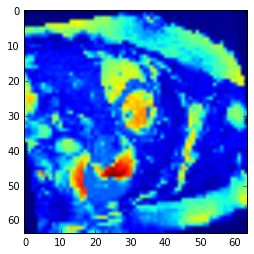

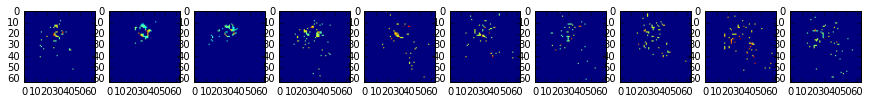

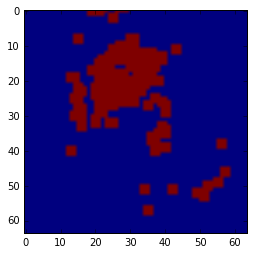

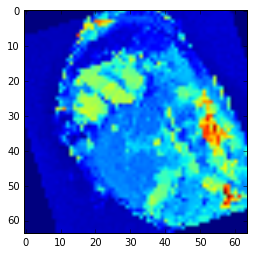

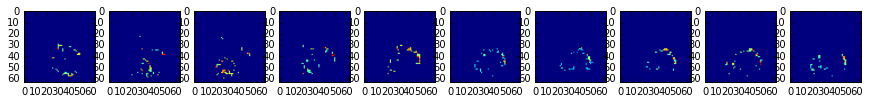

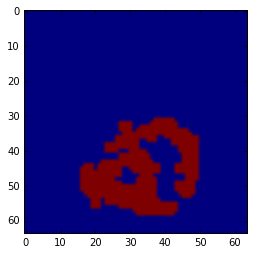

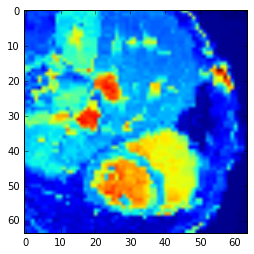

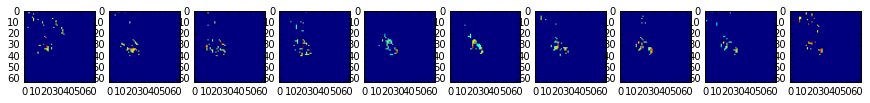

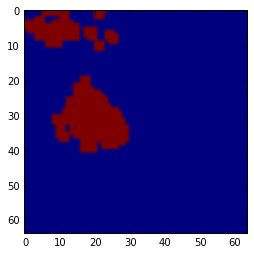

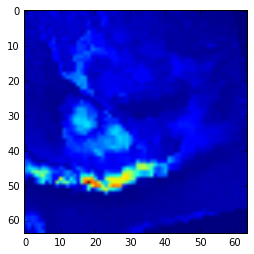

In [87]:
for i in range(min(10, len(d[1]))):
    plt.figure(figsize=(15, 5))
    acc = np.zeros(d[2][i][0].shape)
    for j in range(29):
        
        diff = np.abs(d[2][i][j+1]-d[2][i][j])
        diff[diff<np.percentile(diff, 99)] = 0
        diff = ndimage.grey_dilation(diff, size=(2, 2))
        diff = ndimage.grey_erosion(diff, size=(2, 2))
        acc += diff
        if j<10:
            plt.subplot(1, 10, j+1)
            plt.imshow(diff)
        
    plt.show()
    acc[acc<np.percentile(acc, 95)] = 0
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    acc = ndimage.grey_erosion(acc, size=(2, 2))
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    acc = ndimage.grey_erosion(acc, size=(2, 2))
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    acc = ndimage.grey_dilation(acc, size=(2, 2))
    plt.imshow(acc>np.median(acc))
    plt.show()
    plt.imshow(d[2][i][0])
    plt.show()

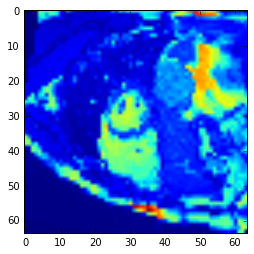

In [26]:
plt.imshow(d[2][0][0])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

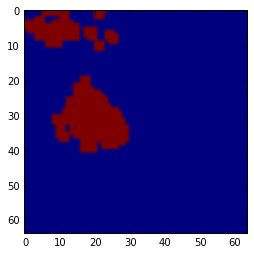

In [91]:
b = acc>np.median(acc)

plt.imshow(b)
b*1
